<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Clases/Clase7/Clase7_1_Regresion_lineal_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 8: Regresión lineal en R

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

## Especificación matemática del problema


Supongamos que interesa predecir el nivel de ventas de un determinado producto en función de los montos invertidos en distintos medios de publicidad (tv, radio, periódico).


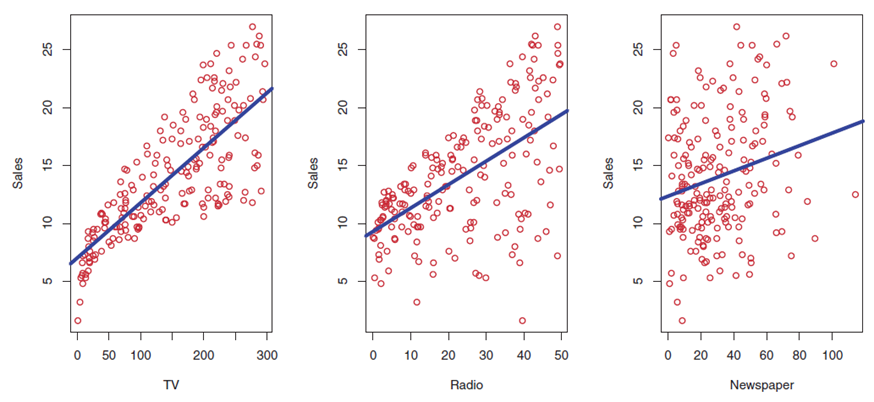

En general, el problema podría expresarse matemáticamente de la siguiente manera:
  \begin{align}
  Y &= f(X) + \epsilon  \ \ \ \ \ \ \ \ (1)
  \end{align}
  
Donde $X$ contiene a las variables explicativas (monto en tv, radio y periódico en el ejemplo), y $\epsilon$ es un error aleatorio no observable.
En esta especificación, f es una función desconocida y que buscamos estimar.
En términos simples, diremos que un modelo es de regresión, cuando en la expresión (1), la variable de interés a predecir, Y, es una variable numérica.

## Modelo de regresión lineal

Cuando el modelo $f$ a estimar, se asume como una función lineal (en los parámetros), diremos que (1) es un modelo de regresión lineal. En tal caso, el modelo matemático queda expresado de la siguiente manera:
   \begin{align}
   Y=\beta_0+\beta_1 X_1+\beta_2 X_2+…+\beta_p X_p  +\epsilon 
   \end{align}
Donde $\beta_i,i=0,. . .,p$ son los parámetros a estimar (estos parámetros definen al modelo), y $\epsilon$ es un error aleatorio no observable, típicamente siguiendo una distribución aleatoria normal $𝑁(0,\sigma^2)$.

### Nota:

Cuando los coeficientes a estimar (betas), o alguna función de ellos corresponde a una exresión no lineal, el modelo de regresión deja de serlo también. Por ejemplo, una especifiacción de la forma 
$Y = \beta_0 + \beta_1 \beta_2 X_1+ \beta_2 X_2 $ es un modelo no lineal, mientras que $Y = \beta_0 + \beta_1X_1+ \beta_2 X^3_2 $ sí lo es.

## Estimación de coeficientes

Tanto en R como en la mayoría de los softwares, la manera estándar de estimar los coeficientes en un modelo de regresión, es mediante la estimación vía mínimos cuadrados, donde se busca minimizar la suma residual:
$\sum\limits_{𝑖=1}^n (\hat{y}_i−y_i )^2 $
No entraremos en detalle, respecto de las bondades de esta estimación y que coincide con otros estimadores en el caso de la regresión lineal con errores normales.

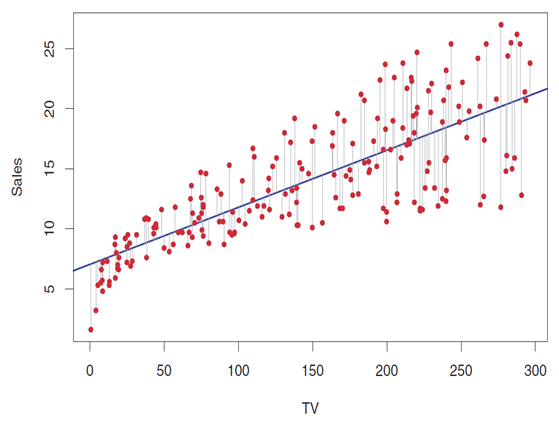

Sin entrar en más detalles técnicos, veamos como podemos ajustar una regresión lineal en R.
Para ello podemos utilizar la función `lm()`, del paquete base. Esta recibe como argumento principal una formula y un datasets, del siguiente modo.<br>
<center>`lm(formula = y ~ x1 + x2 + ... + xp, data = dataset)`</center>
    <br>
Generemos nuestra primera regresión lineal con el dataset _Advertising_. El cual contiene las ventas totales de un producto y los montos invertidos en tres tipos de publicidad (tv, radio, periódico). En esta primera iteración consideremos solamente la variable newspapper.

In [ ]:
library(ggplot2)
ventas <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R_v2/master/Clases/Clase7/Advertising.csv",h=T)


In [ ]:
head(ventas) # El X es in id de fila.
dim(ventas)

ventas$X <- NULL

In [ ]:
head(ventas)

Aquí, estamos asumiento que el modelo es $Y = \beta_0 + \beta_1X_1+ \epsilon$, donde $X_1$ corresponde a la variable _newspaper_ e  $Y$ a _sales_ 

In [ ]:
# Creamos nuestro primer modelo lineal considerando newspaper.


In [ ]:
# Clase, estructura y resumen del modelo


Del resumen anterior podemos observar la siguiente información

   * **Residuals:** Muestra estadísticos de posición de los residuos obtenidos.
   * **Coefficients:** Muestra los valores de los coeficientes estimados del modelo, junto con su error estándar ($\sqrt{\hat{Var}(\hat{\beta}_i)}$), el valor del estadístico *t*,  con el cual es posible evaluar la  significacncia del parámetro estimado, y el valor-p asociado a dicha prueba.
   * **Residual standar error:** Error standar del ajuste. Corresponde a la raiz cuadrada del error cuadrático medio (penalizado por los grados de libertad).
   * **Multuple R-squared:** Corresponde al porcentaje de la varianza explicada por el modelo.
   * **Adjusted R-squared:** Corresponde a una versión penalizada del $R^2$. Toma en cuenta posibles sobre ajustes del modelo.
   * **F-statistic:** Estadistico asociado al test F de Ficsher para evaluar la significancia del modelo. 

In [ ]:
# Podemos generar un nuevo modelo sólo con la variables TV


In [ ]:
# función predict() para realizar predicciones
# Si no seingresan nuevos datos, predict genera las predicciones sobre los valores con los que fue entrenado el modelo.
new <- data.frame(TV =c(100, 120, 200))


In [ ]:
# ¿Cómo podemos agregar la recta predicha al gráfico de de dispersión?
# y = predict(mod2)
  
  


In [ ]:
# Si incluimos las covariables restantes?
 

In [ ]:
summary(mod3)

## Interpretación de los coeficientes
Uno de los aspectos más característicos de la _regresión lineal_, son los coeficientes que determinan el modelo lineal, debido a la interpretación de estos.
Suponiendo un modelo de la forma 
$$Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \dots + \beta_pX_{ip}+ \epsilon_i , \text{ donde } \epsilon_i \sim N(0 ,\sigma^2)$$

Es posible mostrar que $\beta_k$ representa a la tasa de cambio de del valor esperado de $Y$ respecto de $X_k$, cuándo esta última aumenta en una unidad.

In [ ]:
# Es este último modelo mejor?
# Si se aumenta en una unidad el monto invertido en TV, 
#¿Cuál es el aumento esperado en las ventas ?



In [ ]:
# utilice la función confint() para obtener intervalos de confianza para los parámetros estimados.



# Variables categóricas en la regresíon lineal

- También son conocidas como "factores" o "variables cualitativas".
- Permiten clasificar observaciones en grupos
- Clasificación por "niveles"
- Por ejemplo: el género de un invidiuo es una variable categórica que puede tomar dos niveles
    - Hombre
    - Mujer
- Serán necesarios algunos pasos adicionales para considerar dichas variables
    - Separación en variables "binarias" (1/0)

Para este ejemplo considerarmos el dataset `LungCapData`, que contiene informacíon sobre la capacidad pulmonar de distintas personas de acuerdo a las siguientes variables 
* `LungCap`: It’s the lung capacity(closing capacity) of the person
* `Age`: It’s how old is the person
* `Height`: It’s how tall is the person
* `Smoke`: If the person smokes or doesn’t smoke
* `Gender`: If are male or female
* `Cesarean`: If they’re born by Cesarean

In [ ]:
lung_cap_df <- read.delim("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R_v2/master/Clases/Clase7/LungCapData.txt")

In [ ]:
#resumen

In [ ]:
# Coercionamos las variables character a factor para poder utilizarlas en regresión lineal
# Smoke, Gender, Caesarean


In [ ]:
 # nos preparamos para usar una variable binaria o "dummy"/indicador
# vemos que el tipo de variable es otro, de tipo factor y podemos consultar sus niveles.

In [ ]:
# Ajustamos un primer modelo de regresión considerando sólo las variables Age y Smoke

El modelo de regresión ajustado corresponde a:
$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times Smoke$ 

En el caso de ser fumador:

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times Smoke$ 

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times (1)$

$\hat{\mu}_{y|x} = (1.085  - 0.648) + 0.555 \times Age$

$\hat{\mu}_{y|x} = 0.437 + 0.555 \times Age$

En el caso de no ser fumador:

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age$ 

In [ ]:
ggplot(lung_cap_df, aes(x = Age, y = LungCap, color = Smoke)) +
  geom_point() +
  scale_color_manual(values = c("red","blue")) +
  geom_abline(intercept = 1.085, slope = 0.555, color = "blue") +
  geom_abline(intercept = 0.437, slope = 0.555, color = "red")

In [ ]:
# Podemos replicar el mismo gráfico utilizando geom_smooth() ?